In [1]:
# Requires pip install py-cpuinfo

import matplotlib.pyplot as plt
import numpy as np

import pennylane as qml
import pennylane_lightning
import pennylane_lightning.lightning_benchmark as bench

## Processor info

In [2]:
from cpuinfo import get_cpu_info
for key, value in get_cpu_info().items():
    print("{0}: {1}".format(key, value))

python_version: 3.9.0.final.0 (64 bit)
cpuinfo_version: [7, 0, 0]
cpuinfo_version_string: 7.0.0
arch: X86_64
bits: 64
count: 8
arch_string_raw: AMD64
vendor_id_raw: GenuineIntel
brand_raw: Intel(R) Core(TM) i7-4770K CPU @ 3.50GHz
hz_advertised_friendly: 3.5000 GHz
hz_actual_friendly: 3.5010 GHz
hz_advertised: [3500000000, 0]
hz_actual: [3501000000, 0]
l2_cache_size: 1048576
stepping: 3
model: 60
family: 6
l3_cache_size: 8388608
flags: ['3dnow', 'abm', 'acpi', 'aes', 'apic', 'avx', 'avx2', 'bmi1', 'bmi2', 'clflush', 'cmov', 'cx16', 'cx8', 'de', 'ds_cpl', 'dtes64', 'dts', 'erms', 'est', 'f16c', 'fma', 'fpu', 'fxsr', 'ht', 'ia64', 'invpcid', 'lahf_lm', 'mca', 'mce', 'mmx', 'monitor', 'movbe', 'msr', 'mtrr', 'osxsave', 'pae', 'pat', 'pbe', 'pcid', 'pclmulqdq', 'pdcm', 'pge', 'pni', 'popcnt', 'pse', 'pse36', 'rdrnd', 'sep', 'serial', 'smep', 'ss', 'sse', 'sse2', 'sse4_1', 'sse4_2', 'ssse3', 'tm', 'tm2', 'tsc', 'tscdeadline', 'vme', 'vmx', 'xsave', 'xtpr']
l2_cache_line_size: 256
l2_cache_as

## Initialisation code

In [3]:
def benchmarkAndPlot(numRepetitions, nValues, colour, plotLabel, methodForN):
    timingResults = np.empty([len(nValues), 3])
    idx = 0
    for n in nValues:
        timingResult = [n, *bench.benchmarkMethod(numRepetitions, lambda: methodForN(n))]
        print(f"n={n:2} took an average of {timingResult[1]} sec (std dev: {timingResult[2]} sec)")
        timingResults[idx] = timingResult
        idx += 1
    plt.errorbar(timingResults[:,0], timingResults[:,1], yerr=timingResults[:,2], ls = "None", color=colour)
    plt.scatter(timingResults[:,0], timingResults[:,1], s = 20, color=colour, label=plotLabel)
    
def benchmarkCompare(title, numRepetitions, nValues, operationsForN):
    plt.subplot()
    plt.title(title)
    plt.yscale('log')
    plt.xlabel('Number of qubits')
    plt.ylabel('Runtime (seconds)')
    plt.grid(True)
    
    print("Running with old backend:")
    benchmarkAndPlot(numRepetitions, nValues, 'b', 'Old', lambda n: bench.benchmarkApply(n, operationsForN(n)))
    print("Running with new backend:")
    benchmarkAndPlot(numRepetitions, nValues, 'r', 'New', lambda n: bench.benchmarkApplyNew(n, operationsForN(n)))
    plt.legend(loc="upper left")
    plt.show()

## Comparisons

Running with old backend:
n=10 took an average of 0.00039985179901123045 sec (std dev: 0.0005162064818993355 sec)
n=11 took an average of 0.0008969783782958984 sec (std dev: 0.0003152393297288236 sec)
n=12 took an average of 0.0016013622283935548 sec (std dev: 0.0005148734849031851 sec)
n=13 took an average of 0.002799367904663086 sec (std dev: 0.00042399330308265923 sec)
n=14 took an average of 0.005999183654785157 sec (std dev: 0.0006623620396257136 sec)
n=15 took an average of 0.013145518302917481 sec (std dev: 0.0007432160861058601 sec)
n=16 took an average of 0.02920055389404297 sec (std dev: 0.005265665567232792 sec)
n=17 took an average of 0.06129906177520752 sec (std dev: 0.0034996106870989613 sec)
n=18 took an average of 0.12829575538635254 sec (std dev: 0.006236971477736959 sec)
n=19 took an average of 0.27519228458404543 sec (std dev: 0.007114234561363958 sec)
n=20 took an average of 0.5821371078491211 sec (std dev: 0.01510324806134441 sec)
Running with new backend:
n=10 too

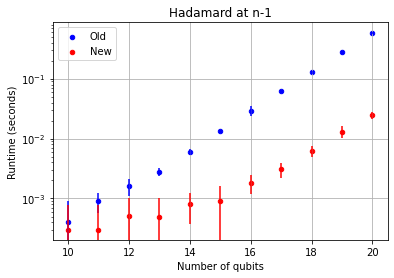

In [4]:
benchmarkCompare("Hadamard at n-1", 10, list(range(10,21)), lambda n: [qml.Hadamard(wires=(n-1))])

Running with old backend:
n=10 took an average of 0.00040056705474853513 sec (std dev: 0.0005171318760342542 sec)
n=11 took an average of 0.0007977008819580079 sec (std dev: 0.000420456927697162 sec)
n=12 took an average of 0.0014971256256103515 sec (std dev: 0.0005255731493787098 sec)
n=13 took an average of 0.003098464012145996 sec (std dev: 0.00031761877863812005 sec)
n=14 took an average of 0.006099152565002442 sec (std dev: 0.0005668104646766745 sec)
n=15 took an average of 0.012996149063110352 sec (std dev: 0.0006676415547231663 sec)
n=16 took an average of 0.029199504852294923 sec (std dev: 0.0017529596323175285 sec)
n=17 took an average of 0.05899534225463867 sec (std dev: 0.0026679203822505856 sec)
n=18 took an average of 0.13122453689575195 sec (std dev: 0.008542911924467529 sec)
n=19 took an average of 0.2784926176071167 sec (std dev: 0.005485490092164815 sec)
n=20 took an average of 0.6029375314712524 sec (std dev: 0.024008973364595003 sec)
Running with new backend:
n=10 to

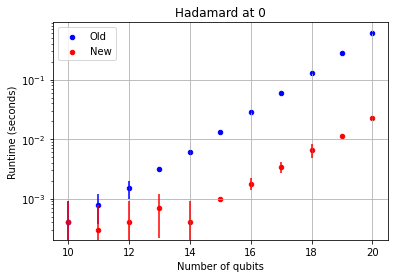

In [5]:
benchmarkCompare("Hadamard at 0", 10, list(range(10,21)), lambda n: [qml.Hadamard(wires=(0))])

Running with old backend:
n=10 took an average of 0.0003976106643676758 sec (std dev: 0.000513330845979032 sec)
n=11 took an average of 0.0007998466491699219 sec (std dev: 0.0004216017574737235 sec)
n=12 took an average of 0.0016967296600341798 sec (std dev: 0.00048460339724868827 sec)
n=13 took an average of 0.0033998966217041017 sec (std dev: 0.0005193051815450249 sec)
n=14 took an average of 0.005602359771728516 sec (std dev: 0.0007033538276988751 sec)
n=15 took an average of 0.013700532913208007 sec (std dev: 0.0010583363803630015 sec)
n=16 took an average of 0.030200266838073732 sec (std dev: 0.001316543831523577 sec)
n=17 took an average of 0.06789846420288086 sec (std dev: 0.003381681096401736 sec)
n=18 took an average of 0.14289479255676268 sec (std dev: 0.006905108453799577 sec)
n=19 took an average of 0.2936877250671387 sec (std dev: 0.006455953442562644 sec)
n=20 took an average of 0.6086820602416992 sec (std dev: 0.01271580197888051 sec)
Running with new backend:
n=10 took 

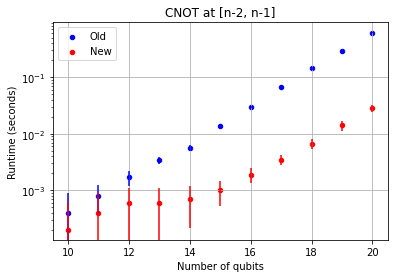

In [6]:
benchmarkCompare("CNOT at [n-2, n-1]", 10, list(range(10,21)), lambda n: [qml.CNOT(wires=(n-2, n-1))])

Running with old backend:
n=10 took an average of 0.0004998207092285156 sec (std dev: 0.000526857352362508 sec)
n=11 took an average of 0.0008984804153442383 sec (std dev: 0.0003158036106504085 sec)
n=12 took an average of 0.0014996528625488281 sec (std dev: 0.0005221197893919869 sec)
n=13 took an average of 0.0026993751525878906 sec (std dev: 0.00048011086487951903 sec)
n=14 took an average of 0.005796909332275391 sec (std dev: 0.00041948785212514276 sec)
n=15 took an average of 0.013196253776550293 sec (std dev: 0.0006270396588559307 sec)
n=16 took an average of 0.029094791412353514 sec (std dev: 0.0019719941258335115 sec)
n=17 took an average of 0.062000393867492676 sec (std dev: 0.0027083582669710344 sec)
n=18 took an average of 0.13059635162353517 sec (std dev: 0.004137456765160311 sec)
n=19 took an average of 0.2751962184906006 sec (std dev: 0.009358921601928059 sec)
n=20 took an average of 0.5742841720581054 sec (std dev: 0.010937156521778714 sec)
Running with new backend:
n=10 

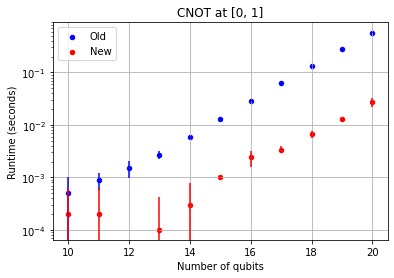

In [7]:
benchmarkCompare("CNOT at [0, 1]", 10, list(range(10,21)), lambda n: [qml.CNOT(wires=(0, 1))])